In [1]:
import copy
import random

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
_NAME_COUNT_ = len(words)

_TRAIN_FRAC_ = 0.80
_HOLD_FRAC_ = 0.2
words_trn = words[:int(_NAME_COUNT_ * _TRAIN_FRAC_)]
words_hold = words[:int(_NAME_COUNT_ * _HOLD_FRAC_)]

In [5]:
random.seed(1337)

words_val = random.sample(words_hold, len(words_hold) // 2)

words_test = list(set(words_hold).difference(set(words_val)))


In [6]:
_STRT_CHAR_ = '<S>'
_END_CHAR_ = '<E>'

In [7]:
count_dict = {}

for w in words_trn:
    chs = [_STRT_CHAR_] + list(w) + [_END_CHAR_]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        count_dict[bigram] = count_dict.get(bigram, 0) + 1

In [8]:
sorted(count_dict.items(), key= lambda kv: -kv[1])

[(('a', '<E>'), 6411),
 (('n', '<E>'), 4740),
 (('a', 'n'), 4328),
 (('<S>', 'a'), 3700),
 (('e', '<E>'), 3448),
 (('n', 'a'), 2762),
 (('e', 'l'), 2712),
 (('a', 'r'), 2613),
 (('l', 'e'), 2585),
 (('r', 'i'), 2461),
 (('l', 'a'), 2340),
 (('<S>', 'k'), 2334),
 (('l', 'i'), 2225),
 (('a', 'l'), 2199),
 (('i', 'a'), 2194),
 (('h', '<E>'), 2137),
 (('m', 'a'), 2119),
 (('<S>', 'm'), 2115),
 (('i', '<E>'), 2098),
 (('e', 'n'), 2069),
 (('a', 'h'), 2053),
 (('r', 'a'), 1979),
 (('y', 'a'), 1929),
 (('<S>', 'j'), 1847),
 (('n', 'n'), 1754),
 (('y', '<E>'), 1727),
 (('i', 'n'), 1721),
 (('h', 'a'), 1707),
 (('a', 'y'), 1684),
 (('<S>', 's'), 1668),
 (('y', 'n'), 1626),
 (('o', 'n'), 1626),
 (('n', 'i'), 1496),
 (('l', 'y'), 1483),
 (('e', 'r'), 1452),
 (('k', 'a'), 1416),
 (('i', 'e'), 1381),
 (('a', 'i'), 1335),
 (('<S>', 'l'), 1330),
 (('<S>', 'r'), 1319),
 (('a', 'm'), 1293),
 (('<S>', 'e'), 1278),
 (('r', 'e'), 1276),
 (('<S>', 'd'), 1260),
 (('<S>', 'c'), 1248),
 (('n', 'e'), 1183),
 (

In [9]:
import torch

### Creating Matrix Representation of 2-Chars Counts

#### How do encode Character strings into an array?

In [10]:
chars = sorted(list(set(''.join(words))))

## String to Index Mapping ##
### Encoding ###
stoi = {s:i + 1 for i,s in enumerate(chars)}

### adding encoding for special start and end chars. "." is kept for both
stoi['.'] = 0

In [11]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

### Decoding array into Character Strings

In [12]:
itos = {i:s for s, i in stoi.items()}

In [13]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [14]:
N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)

In [15]:
for w in words_trn:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1, ix2] +=1

    

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

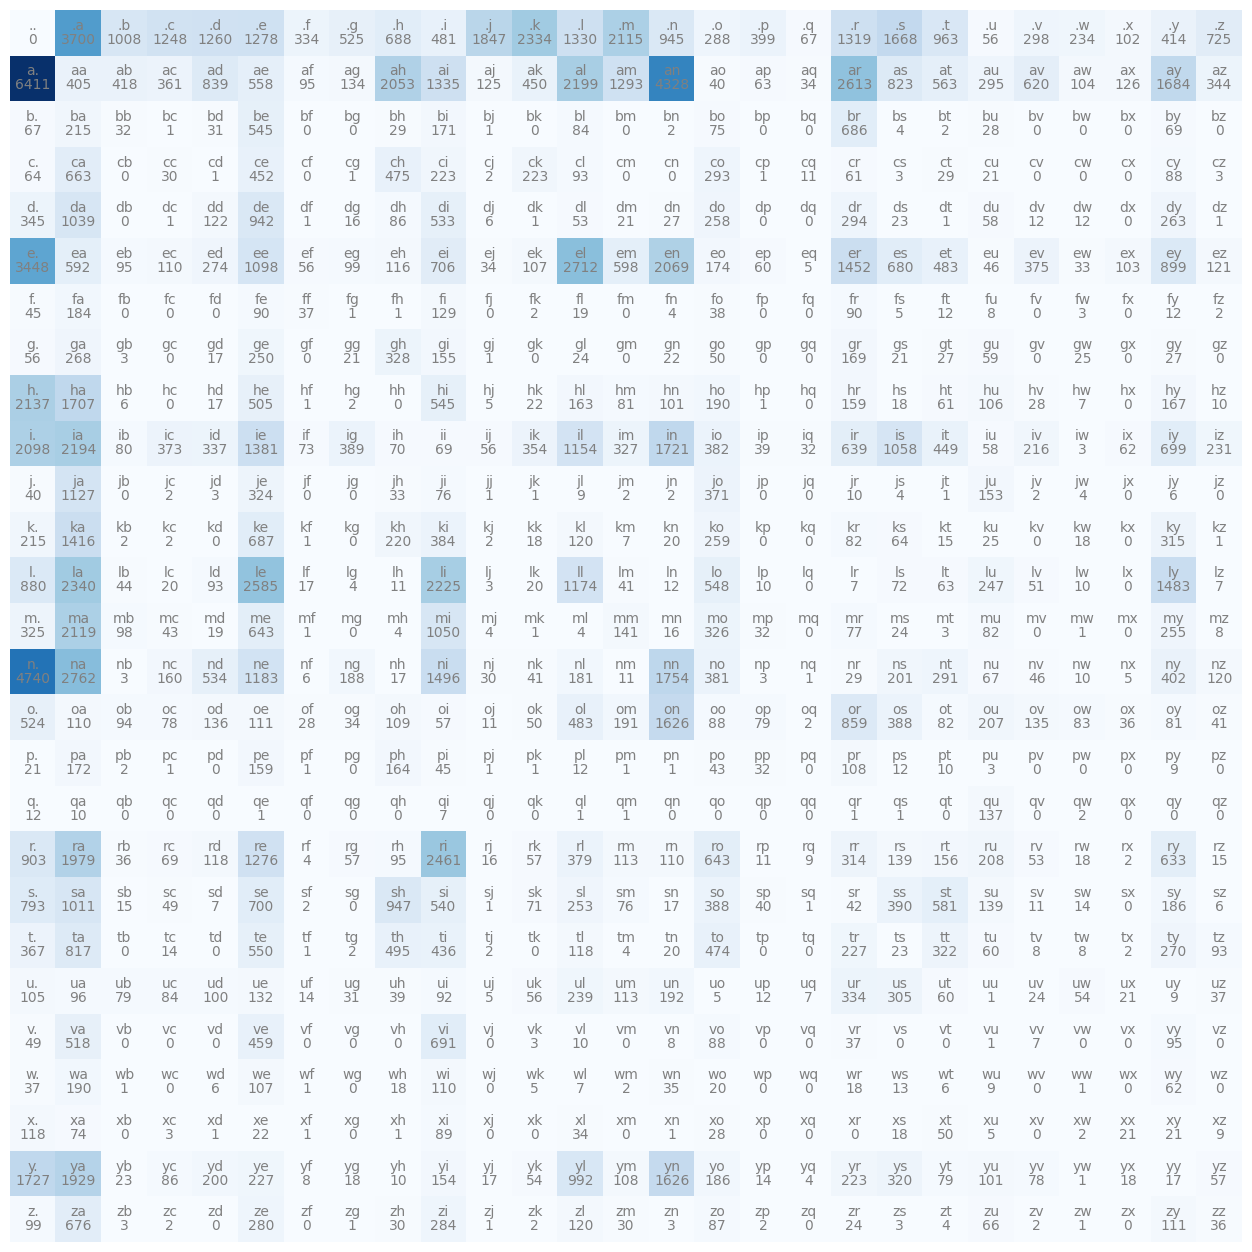

In [18]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(len(stoi)):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray') ## Adding characrer bigram strings 'aj', 'by' at position i,j 
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color='gray') ## Adding number of times they occur together

plt.axis('off');



In [19]:
p = N[0].float()

p = p / p.sum()

p

tensor([0.0000, 0.1444, 0.0393, 0.0487, 0.0492, 0.0499, 0.0130, 0.0205, 0.0268,
        0.0188, 0.0721, 0.0911, 0.0519, 0.0825, 0.0369, 0.0112, 0.0156, 0.0026,
        0.0515, 0.0651, 0.0376, 0.0022, 0.0116, 0.0091, 0.0040, 0.0162, 0.0283])

In [20]:
g = torch.Generator().manual_seed(2147483647) ## fixing seed

ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix
itos[ix]

'c'

In [21]:
g = torch.Generator().manual_seed(2147483647) ## fixing seed

p = torch.rand(3, generator=g) ## generating 3 random numbers b/w 0 to 1

p = p / p.sum() ## Converting to probabilty Distr. for each drawn umbers

p

tensor([0.6064, 0.3033, 0.0903])

In [22]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [23]:
P = N / N.sum(dim=-1, keepdim=True)
P = P.float()

In [24]:
P[0, :].sum()

tensor(1.)

In [25]:
ix = 0
g = torch.Generator().manual_seed(2147483647) ## fixing seed

for k in range(15):
    out = []
    while True:
        p = P[ix, :]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

cexze.
momaluraile.
kaynn.
minimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
eyla.
sade.
eniaviyny.


### Evaluation of Model in terms of log likelihood

In [26]:
_END_CHAR_

'<E>'

In [ ]:
##### Train

In [27]:
log_prob_mat = P.log()
neg_likehood_score = 0
iteration_Count = 0
for w in words_trn:
    chs = ['.'] + list(w) + ['.']
    # print(f"WORD = {"".join(chs)}")
    neg_log_prob = 0
    for ch1, ch2 in zip(chs, chs[1:]):
        neg_log_prob
        ix1 = stoi.get(ch1)
        ix2 = stoi.get(ch2)

        joint_prob = P[ix1,ix2].item()
        log_prob = -log_prob_mat[ix1,ix2].item()
        # print(f"bi-gram = {ch1,ch2} | Probability = {round(joint_prob,3)} | -Ve Log Probabilty = {round(log_prob,3)}")
        neg_log_prob += log_prob
        iteration_Count += 1
    neg_likehood_score += neg_log_prob
    
print(f"Mean Likelihood Score: {neg_likehood_score / iteration_Count}")


Mean Likelihood Score: 2.4241540385630413


In [28]:
#### Validation
log_prob_mat = P.log()
neg_likehood_score = 0
iteration_Count = 0
for w in words_val:
    chs = ['.'] + list(w) + ['.']
    # print(f"WORD = {"".join(chs)}")
    neg_log_prob = 0
    for ch1, ch2 in zip(chs, chs[1:]):
        neg_log_prob
        ix1 = stoi.get(ch1)
        ix2 = stoi.get(ch2)

        joint_prob = P[ix1,ix2].item()
        log_prob = -log_prob_mat[ix1,ix2].item()
        # print(f"bi-gram = {ch1,ch2} | Probability = {round(joint_prob,3)} | -Ve Log Probabilty = {round(log_prob,3)}")
        neg_log_prob += log_prob
        iteration_Count += 1
    neg_likehood_score += neg_log_prob
    
print(f"Mean Likelihood Score: {neg_likehood_score / iteration_Count}")

Mean Likelihood Score: 2.340342902148971


In [29]:
#### Test
log_prob_mat = P.log()
neg_likehood_score = 0
iteration_Count = 0
for w in words_test:
    chs = ['.'] + list(w) + ['.']
    # print(f"WORD = {"".join(chs)}")
    neg_log_prob = 0
    for ch1, ch2 in zip(chs, chs[1:]):
        neg_log_prob
        ix1 = stoi.get(ch1)
        ix2 = stoi.get(ch2)

        joint_prob = P[ix1,ix2].item()
        log_prob = -log_prob_mat[ix1,ix2].item()
        # print(f"bi-gram = {ch1,ch2} | Probability = {round(joint_prob,3)} | -Ve Log Probabilty = {round(log_prob,3)}")
        neg_log_prob += log_prob
        iteration_Count += 1
    neg_likehood_score += neg_log_prob
    
print(f"Mean Likelihood Score: {neg_likehood_score / iteration_Count}")

Mean Likelihood Score: 2.3539378871307317


In [ ]:
ch2

In [ ]:
log_prob = P.log()


In [ ]:
import numpy as np

In [ ]:
np.log(.39)

In [ ]:
ch2

In [ ]:
"xx".join(w)

### Using Neural Network Approach

In [ ]:
## Creation of training set of bigrans (x,y)

xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
xs

In [ ]:
ys

#### One Hot Encoding

In [ ]:
import torch.nn.functional as F

In [ ]:
x_enc = F.one_hot(xs, num_classes=27).float()
y_enc = F.one_hot(ys, num_classes=27).float()

In [ ]:
plt.imshow(x_enc)

In [ ]:
plt.imshow(y_enc)

In [ ]:
x_enc

In [ ]:
y_enc

#### 1 Layer Simple Neurons

In [ ]:
W = torch.randn(size=(27,27))

x_enc @ W

## (5,27) @ (27, 27) -> (5, 27)

In [ ]:
logits = (x_enc @ W) ## Log-Counts / Fire Rate of Neuron

counts = logits.exp() ## Equivalent to Count Matrix

prob = counts / counts.sum(1, keepdims=True)

In [ ]:
## Summary
xs 

In [ ]:
ys

In [ ]:
## Randomly Assign 27 neurons weights. each neuron recieves 27 dimensional input [1 hot encoded]
g = torch.Generator().manual_seed(2147458333647)
W = torch.randn(size=(27,27), generator=g)

In [ ]:
## Forward Pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W ## Prediction log - counts
counts = logits.exp() ## Counts, equivalent to N

probs = counts / counts.sum(1, keepdim=True) ## Prob for next character

## last 3 step is Softmax Operation

In [ ]:
probs.shape

##### Sample Example [Forward Pass]

In [ ]:
nlls = torch.zeros(5)

for i in range(5):
    ## i-th bigram:
    x = xs[i].item() # Input Chracter Index
    y = ys[i].item() # Label character index

    print('--------')
    print(f'Bi-Gram Example {i +1}: {itos[x]} | {itos[y]} (indexes {x}, {y})')
    print('input to neural net:',x)
    print('output probabilties form the nerual net:', prob[i])
    print('label (actual next charactaer):', y)

    ## prob assigned by model ##
    p = probs[i ,y]

    print('prob assigned by the next to correct chars', p.item())

    logp = torch.log(p)
    print('Log Likelihood given by model to correect chars', logp.item())

    nll = -logp

    print('negative Log Likelihood given by model to correect chars', -logp.item())

    nlls[i] = nll
print("---------")
print(nlls)
print(f"Average Negative log likelohood, (loss): {nlls.mean()}")

##### Weight Optimization

In [ ]:
xs

In [ ]:
ys

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass #
xenc = F.one_hot(xs, num_classes=27).float() ## 1 hot encoding of xs, xs is encoding in bi-gram (Single Char) in Character level Bigram Model
logits = xenc @ W ## Log-Counts obtained for next characters
counts = logits.exp() ## Counts 
probs = counts / counts.sum(1, keepdims=True) ## Probability

loss = -probs[torch.arange(5), ys].log().mean() ## Getting Probablity of ys is prob matrix

In [ ]:
print(loss.item())

In [ ]:
# Backword Pass #
W.grad = None # set to zero the gradient
loss.backward()

W.data += -0.1 * W.grad


In [ ]:
words[:1]

#### Weight Opt for all words

In [ ]:
xs, ys = [], []

for w in words:
    

In [ ]:
## Creation of training set of bigrams (x,y)

xs, ys = [], []

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()

## Initialize the `network`
g = torch.Generator().manual_seed(2137436374)
W = torch.randn(27, 27, requires_grad=True, generator=g)
xenc = F.one_hot(xs, num_classes=27).float()

In [ ]:
xenc.shape

In [ ]:
ys.shape

In [ ]:
## Gradient Descent

### Running for 10 epochs
for k in range(100):
    
    logits = xenc @ W # Predicting Log-Counts (N_SAMP, 27) * (27, 27) -> (N_SAMP, 27)

    counts = logits.exp() # Counts, Equivalent to N

    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(num), ys].log().mean()

    print(loss.item())

    ## backward Pass ##
    W.grad = None
    loss.backward()

    ## Update weights
    W.data += -50 * W.grad
    

In [ ]:
## Gradient Descent 
## Using NN that cross entropy loss directly

### Running for 10 epochs
for k in range(100):
    
    logits = xenc @ W # Predicting Log-Counts (N_SAMP, 27) * (27, 27) -> (N_SAMP, 27)

    loss = F.cross_entropy(logits, ys)

    print(loss.item())
    
    W.grad = None
    loss.backward()

    ## Update weights
    W.data += -50 * W.grad

In [ ]:
xenc.shape

In [ ]:
logits.shape

In [ ]:
ys

In [ ]:
# Example of target with class indices
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
# loss.backward()
# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# loss = F.cross_entropy(input, target)
# loss.backward()

In [ ]:
loss

In [ ]:
target

In [ ]:
W.exp()